In [ ]:
import sys, os
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    file_name = 'graph.ipynb'
    path_to_file = '/content/gdrive/MyDrive/CS5344/'
    print(path_to_file)
    os.chdir(path_to_file)
!pwd

Mounted at /content/gdrive
/content/gdrive/MyDrive/CS5344/
/content/gdrive/MyDrive/CS5344


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
dat = pd.read_csv("data.csv", sep=",(?=\S)", engine="python")
id2name = {}
id_lst = []
id2num_of_followed = {}
G = nx.DiGraph()
ori_nodes, ori_edges = set(), set()
nodes, edges = set(), set()
for idx, row in dat.iterrows():
    user_id = row["id"].strip('"')
    id_lst.append(user_id)
    user_name = row["screenName"].strip('"')
    num_of_followed = row["followersCount"]
    id2name[user_id] = user_name
    id2num_of_followed[user_id] = num_of_followed
    following = row["friends"].strip('[]').split(",")
    following = [x.replace('"', '').replace(' ', '') for x in following] if following != [''] else []
    ori_nodes.add(user_id)
    nodes.add(user_id)
    for fo in following:
        ori_nodes.add(fo)
        ori_edges.add((user_id, fo))

print(len(ori_nodes), len(ori_edges))
for u, v in ori_edges:
  if v in nodes:
    edges.add((u, v))
print(len(nodes), len(edges))
del dat

12891797 32887153
40000 184548


In [ ]:
G.add_nodes_from(nodes)
G.add_edges_from(edges, weight=1.)
nx.write_gpickle(G, 'twitter.graph')
del ori_nodes, ori_edges, nodes, edges

In [ ]:
G = nx.read_gpickle('twitter.graph')

### Identify Influencers Using Node Centrality Measures

In [ ]:

in_degree_centrality_df = pd.DataFrame(nx.in_degree_centrality(G).items(), columns=["user", "in_degree_cent"])
pagerank_centrality_df = pd.DataFrame(nx.pagerank(G, max_iter=500).items(), columns=["user", "pagerank_cent"])
closeness_centrality_df = pd.DataFrame(nx.closeness_centrality(G).items(), columns=["user", "closeness_cent"])
hub_scores, auth_scores = nx.hits(G)
hub_centrality_df = pd.DataFrame(hub_scores.items(), columns=["user", "hub_cent"])
auth_centrality_df = pd.DataFrame(auth_scores.items(), columns=["user", "auth_cent"])

summary = in_degree_centrality_df.merge(pagerank_centrality_df, on="user").merge(closeness_centrality_df, on="user").merge(hub_centrality_df, on="user").merge(auth_centrality_df, on="user")
summary["avg_cent"] = (summary["in_degree_cent"]+summary["closeness_cent"]+summary["pagerank_cent"]+summary["hub_cent"]+summary["auth_cent"])/5
summary["user"] = summary["user"].apply(lambda x: id2name[x]+"("+x+")")
summary = summary.sort_values(by=["avg_cent"], ascending=False)

In [ ]:
summary.reset_index(drop=True, inplace=True)
summary.head(20)

,user,in_degree_cent,pagerank_cent,closeness_cent,hub_cent,auth_cent,avg_cent
0,RyanSeacrest(16190898),0.051976,0.008779,0.243882,0.000049,0.035435,0.068024
1,GreysABC(189283341),0.043151,0.008184,0.220442,0.000024,0.017700,0.057900
2,Sia(23497233),0.036901,0.005238,0.224048,0.000003,0.018594,0.056957
3,Alyssa_Milano(26642006),0.021226,0.008211,0.223009,0.000168,0.010574,0.052637
4,NickelodeonTV(58309829),0.018325,0.002199,0.215075,0.000177,0.010790,0.049313
5,UrbanDecay(18912121),0.022201,0.002775,0.210737,0.000036,0.007710,0.048692
6,NayaRivera(75206471),0.019700,0.002143,0.211025,-0.000000,0.009848,0.048543
7,colliscool(384047557),0.037901,0.005002,0.187254,0.000026,0.010221,0.048081
8,marieclaire(19074134),0.010750,0.003526,0.217829,0.000144,0.005074,0.047465
9,katewalsh(70246837),0.013875,0.001920,0.206362,0.000007,0.007456,0.045924


In [ ]:
top_users_20 = summary.loc[:20, "user"].tolist()
top_id_20 = [x.split("(")[1].strip(")") for x in top_users_20]
print(top_id_20)

['16190898', '189283341', '23497233', '26642006', '58309829', '18912121', '75206471', '384047557', '19074134', '70246837', '394216985', '94039455', '423723318', '113439399', '72568426', '19743731', '23642374', '219682445', '2896294831', '24382752', '74231747']


In [ ]:
top_id_20 = ['16190898', '189283341', '23497233', '26642006', '58309829', '18912121', '75206471', '384047557', '19074134', '70246837', '394216985', '94039455', '423723318', '113439399', '72568426', '19743731', '23642374', '219682445', '2896294831', '24382752', '74231747']

In [ ]:
# df = {"user":[x for x in summary["user"]]}
# df["followersCount"] = [id2num_of_followed[x] for x in summary["user"]]
# df["avg_centrality"] = [x for x in summary["avg_cent"]]

influ_likes = pd.read_csv("./influ_likes.csv", sep=",")
influ_likes["avg_likes"] = influ_likes["likes"].apply(lambda x: sum(int(y.strip(" ")) for y in x.strip("[]").split(","))/20)
influ_likes["user"] = [x for x in summary.loc[:20,"user"]]

In [ ]:
df = pd.merge(summary.loc[:19,:], influ_likes.loc[:19,:], on="user")
df["followersCount"] = [id2num_of_followed[str(x)] for x in df.loc[:, "id"]]
df = df.loc[:, ["user", "avg_cent", "followersCount", "avg_likes"]]
avg_likes = [x for x in df["avg_likes"]]
cnt = [x for x in df["followersCount"]]
df["reach efficiency"] = [avg_likes[i] / cnt[i] for i in range(len(cnt))]
df

,user,avg_cent,followersCount,avg_likes,reach efficiency
0,RyanSeacrest(16190898),0.068024,14765554,265.75,0.000018
1,GreysABC(189283341),0.057900,2446071,589.10,0.000241
2,Sia(23497233),0.056957,2544982,2782.20,0.001093
3,Alyssa_Milano(26642006),0.052637,2887813,299.95,0.000104
4,NickelodeonTV(58309829),0.049313,3981436,245.00,0.000062
5,UrbanDecay(18912121),0.048692,886745,46.10,0.000052
6,NayaRivera(75206471),0.048543,1722158,39792.00,0.023106
7,colliscool(384047557),0.048081,134730,586.20,0.004351
8,marieclaire(19074134),0.047465,2169865,2.60,0.000001
9,katewalsh(70246837),0.045924,760363,3115.30,0.004097


### Finding Influencers' K-nearest neighbors(predecessors)

In [ ]:
def nearestneighbors(G, user_id, K=2):
  lst = [user_id]
  res = [user_id]
  for iter in range(K):
    for _ in range(len(lst)):
      uid = lst.pop(0)
      for pid in G.predecessors(uid):
        if pid not in res:  
          res.append(pid)
          lst.append(pid)
  return res[1:]

def nearestneighbors_v2(G, user_id, K=2):
  lst = [user_id]
  res = []
  for iter in range(K):
    for _ in range(len(lst)):
      uid = lst.pop(0)
      for pid in G.predecessors(uid):
        if (pid,uid) not in res:  
          res.append((pid,uid))
          lst.append(pid)
  return res

In [ ]:
full = []
top50 = []
for uid in top_id_20:
  res = nearestneighbors(G, uid)
  res_top50 = sorted(res, key=lambda x:id2num_of_followed[x], reverse=True)[:50]
  full_line = uid + "\t" + ",".join(res)
  line = uid + "\t" + ",".join(res_top50)
  full.append(full_line)
  top50.append(line)
with open("full_neighbors.txt", "w", encoding="utf-8") as f:
  for l in full:
    f.write(l+"\n")
f.close()
with open("top50_neighbors.txt", "w", encoding="utf-8") as f:
  for l in top50:
    f.write(l+"\n")
f.close()

### Graph Visualization

In [ ]:
!pip install pyecharts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.0 MB/s 
     |████████████████████████████████| 130 kB 41.8 MB/s 


In [ ]:
from pyecharts.charts import Pie
from pyecharts.charts import Graph
from pyecharts import options as opts

In [ ]:
full_dic = {}
top200_dic = {}
for uid in top_id_20:
  res = nearestneighbors_v2(G, uid)
  res_top50 = sorted(res, key=lambda x:id2num_of_followed[x[0]], reverse=True)[:50]
  full_dic[uid] = res
  top200_dic[uid] = res_top50

In [ ]:
sent_labels = {"happiness": "#71995a", "fun": "#f2e499", "neutral": "#d1a082", "sadness": "#dfdedf", "hate": "#71995a"}
user2sent_label = {}
influencer_id = -1
with open("./sentiment.txt", "r", encoding="utf-8") as f:
  for line in f.readlines()[1:]:
    line = line.strip("\n").split(",")
    if influencer_id == -1 or line[1] != influencer_id:
      influencer_id = line[1]
    
    if influencer_id not in user2sent_label:
      user2sent_label[influencer_id] = {}
    else:
      user2sent_label[influencer_id][line[0]] = line[-1]


In [ ]:
print(set(res_top50))
print(len(list(set(user2sent_label["16190898"].keys()))))

{'26140710', '26577824', '189283341', '114870386', '5654712', '72568426', '394216985', '84424885', '790380559', '18912121', '6753242', '19409270', '76823111', '23779324', '15074642', '26105653', '174144887', '21308602', '23642374', '58309829', '24382752', '177378345', '38151136', '17856334', '5625972', '20455625', '94039455', '7215082', '16745015', '74231747', '19772559', '313379422', '387352949', '19743731', '16331259', '175954697', '43803786', '113439399', '524396430', '15658327', '29627447', '16212685', '22745779', '18857913', '26642006', '742051266', '19074134', '169572927', '2896294831', '15566901'}
46


In [ ]:
def user_subnetwork(user_id, sents, neighbors, mod="full"):
    factor = 1e-5
    nodes = [{"name": id2name[user_id]+"("+sents.get(user_id, "neutral")+")", "symbolSize": id2num_of_followed[user_id]*factor, "itemStyle":{"color": sent_labels[sents[user_id]]}}]
    links = []
    print("Creating subgraph for user {}...".format(id2name[user_id]+"("+user_id+")"))
    for u in neighbors:
      if {"name": id2name[u]+"("+sents.get(u, "neutral")+")", "symbolSize": id2num_of_followed[u]*factor, "itemStyle":{"color": sent_labels[sents.get(u, "neutral")]}} not in nodes:
        nodes.append({"name": id2name[u]+"("+sents.get(u, "neutral")+")", "symbolSize": id2num_of_followed[u]*factor,"itemStyle":{"color": sent_labels[sents.get(u, "neutral")]}})
      if {"source": id2name[u]+"("+sents.get(u, "neutral")+")", "target":id2name[user_id]+"("+sents.get(user_id, "neutral")+")"} not in links:
        links.append({"source": id2name[u]+"("+sents.get(u, "neutral")+")", "target":id2name[user_id]+"("+sents.get(user_id, "neutral")+")"})
    print(len(nodes), len(links))
    g = (Graph(init_opts=opts.InitOpts(width="2000px", height="1000px"))
            .add("", nodes, links, repulsion=200, is_focusnode=True, is_roam=True, label_opts=opts.LabelOpts(is_show=True),
                 layout="force",
                 linestyle_opts=opts.LineStyleOpts(width=2, curve=0.1, opacity=0.7))
            .set_global_opts(
                    title_opts=opts.TitleOpts(title="subgraph of influencer_{}".format(id2name[user_id]+"("+user_id+")")))
            .render("./user_" + id2name[user_id]+"("+user_id+")" + mod + ".html"))

In [ ]:
res = nearestneighbors(G, "16190898")
res_top50 = sorted(res, key=lambda x:id2num_of_followed[x], reverse=True)[:50]
user_subnetwork("16190898", user2sent_label["16190898"], res_top50, mod="top50")

res = nearestneighbors(G, "189283341")
res_top50 = sorted(res, key=lambda x:id2num_of_followed[x], reverse=True)[:50]
user_subnetwork("189283341", user2sent_label["189283341"], res_top50, mod="top50")

res = nearestneighbors(G, "23497233")
res_top50 = sorted(res, key=lambda x:id2num_of_followed[x], reverse=True)[:50]
user_subnetwork("23497233", user2sent_label["23497233"], res_top50, mod="top50")

res = nearestneighbors(G, "19743731")
res_top50 = sorted(res, key=lambda x:id2num_of_followed[x], reverse=True)[:50]
user_subnetwork("19743731", user2sent_label["19743731"], res_top50, mod="top50")

res = nearestneighbors(G, "24382752")
res_top50 = sorted(res, key=lambda x:id2num_of_followed[x], reverse=True)[:50]
user_subnetwork("24382752", user2sent_label["24382752"], res_top50, mod="top50")

Creating subgraph for user RyanSeacrest(16190898)...
51 50
Creating subgraph for user GreysABC(189283341)...
51 50
Creating subgraph for user Sia(23497233)...
51 50
Creating subgraph for user AlfredoFlores(19743731)...
51 50
Creating subgraph for user bretteldredge(24382752)...
51 50


In [ ]:
!pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=5f48f2f82a36e302a222ee5cf01fd054f466eb924f95e6b35ed15c24ae114f5b
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [ ]:
from node2vec import Node2Vec

In [ ]:
node2vec = Node2Vec(G, dimensions=16, walk_length=10, num_walks=100, p=0.25, q=4, workers=1)
model = node2vec.fit(window=5, min_count=1, batch_words=4)
model.wv.save_word2vec_format("./node2vec.emb")
model.save("./node2vec.model")

Computing transition probabilities:   0%|          | 0/40000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [20:39<00:00, 12.40s/it]


In [ ]:
def load_user_vec(emb_file="./node2vec.emb"):
  user2vec = {}
  with open(emb_file, "r", encoding="utf_8") as f:
      for line in f.readlines()[1:]:
          new = line.strip("\n").split(" ")
          txt = new[0]
          vec = [float(x) for x in new[1:]]
          user2vec[txt] = np.array(vec)
    
  return user2vec

user2vec = load_user_vec()
X = []
for uid in id_lst:
  X.append(user2vec[uid])
X = np.array(X)
print(X.shape)

(40000, 16)


In [ ]:
df = {"u_id":[], "c": []}
with open("full_neighbors.txt", "r", encoding="utf-8") as f:
  i = 0
  for l in f:
    influencer, neighbors = l.strip("\n").split("\t")
    df["u_id"].append(influencer)
    df["c"].append(i)
    for neighbor in neighbors.split(","):
      if neighbor not in df["u_id"]:
        df["u_id"].append(neighbor)
        df["c"].append(i)
    i += 1
f.close()
df = pd.DataFrame(df)
X = []
for idx, row in df.iterrows():
  X.append(user2vec[row["u_id"]])
X = np.array(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 21350 samples in 0.001s...
[t-SNE] Computed neighbors for 21350 samples in 10.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21350
[t-SNE] Computed conditional probabilities for sample 2000 / 21350
[t-SNE] Computed conditional probabilities for sample 3000 / 21350
[t-SNE] Computed conditional probabilities for sample 4000 / 21350
[t-SNE] Computed conditional probabilities for sample 5000 / 21350
[t-SNE] Computed conditional probabilities for sample 6000 / 21350
[t-SNE] Computed conditional probabilities for sample 7000 / 21350
[t-SNE] Computed conditional probabilities for sample 8000 / 21350
[t-SNE] Computed conditional probabilities for sample 9000 / 21350
[t-SNE] Computed conditional probabilities for sample 10000 / 21350
[t-SNE] Computed conditional probabilities for sample 11000 / 21350
[t-SNE] Computed conditional probabilities for sample 12000 / 21350
[t-SNE] Computed conditional probabilities for s

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


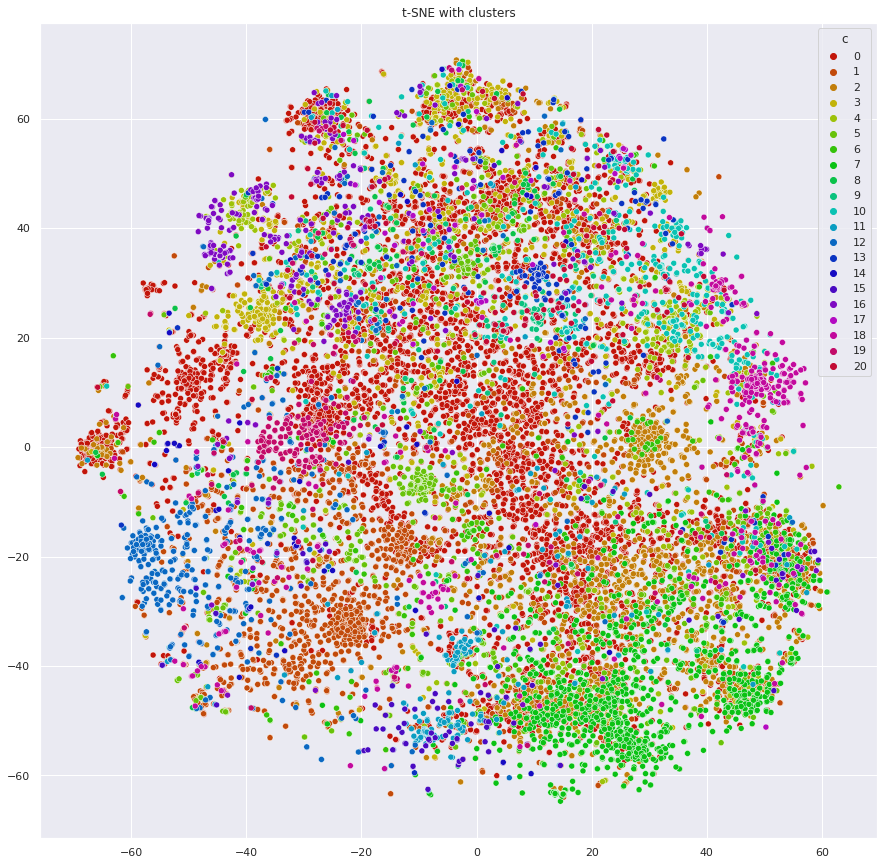

In [ ]:
tsne = TSNE(verbose=1, perplexity=50, n_iter=1000, random_state=42)
X_emb = tsne.fit_transform(X)
pickle.dump(X_emb,open("./tsne_emb_small.pickle", "wb"))
X_emb = pickle.load(open("./tsne_emb_small.pickle", "rb"))
sns.set(rc={'figure.figsize': (15, 15)})
palette = sns.hls_palette(21, l=.4, s=.9)
# plot
sns.scatterplot(X_emb[:, 0], X_emb[:, 1], hue=df["c"], legend='full', palette=palette)
plt.title('t-SNE with clusters')
plt.savefig("./t-sne_cluster_small.png")

In [ ]:
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist

select cluster nums from 10 to 80


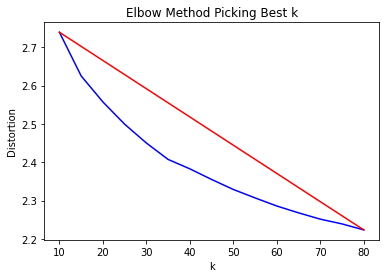

In [ ]:
def kmeans(X):
    start, end = 10, 80
    print("select cluster nums from {} to {}".format(start, end))
    distortions = []
    K = range(start, end+1, 5)
    for k in K:
        k_means = KMeans(n_clusters=k, random_state=42).fit(X)
        k_means.fit(X)
        distortions.append(sum(np.min(cdist(X, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    X_line = [K[0], K[-1]]
    Y_line = [distortions[0], distortions[-1]]
    # Plot the elbow
    plt.plot(K, distortions, 'b-')
    plt.plot(X_line, Y_line, 'r')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method Picking Best k')
    plt.savefig("./Elbow.png")

kmeans(X)

In [ ]:
kmeans = KMeans(n_clusters=30, random_state=42)
y_pred = kmeans.fit_predict(X)

In [ ]:
def nonlabelpic(X_emb):
    sns.set(rc={'figure.figsize': (15, 15)})
    palette = sns.color_palette("bright", 1)

    sns.scatterplot(X_emb[:, 0], X_emb[:, 1], palette=palette)
    plt.title('t-SNE with no Labels')
    plt.savefig("../t-sne.png")


def labelpic(X_emb, y_pred):
    sns.set(rc={'figure.figsize': (15, 15)})
    palette = sns.hls_palette(30, l=.4, s=.9)
    # plot
    sns.scatterplot(X_emb[:, 0], X_emb[:, 1], hue=y_pred, legend='full', palette=palette)
    plt.title('t-SNE with Kmeans Labels')
    plt.savefig("./t-sne_cluster.png")

In [ ]:
tsne = TSNE(verbose=1, perplexity=100, n_iter=1000, random_state=42)
X_emb = tsne.fit_transform(X)
pickle.dump(X_emb,open("./tsne_emb.pickle", "wb"))
X_emb = pickle.load(open("./tsne_emb.pickle", "rb"))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


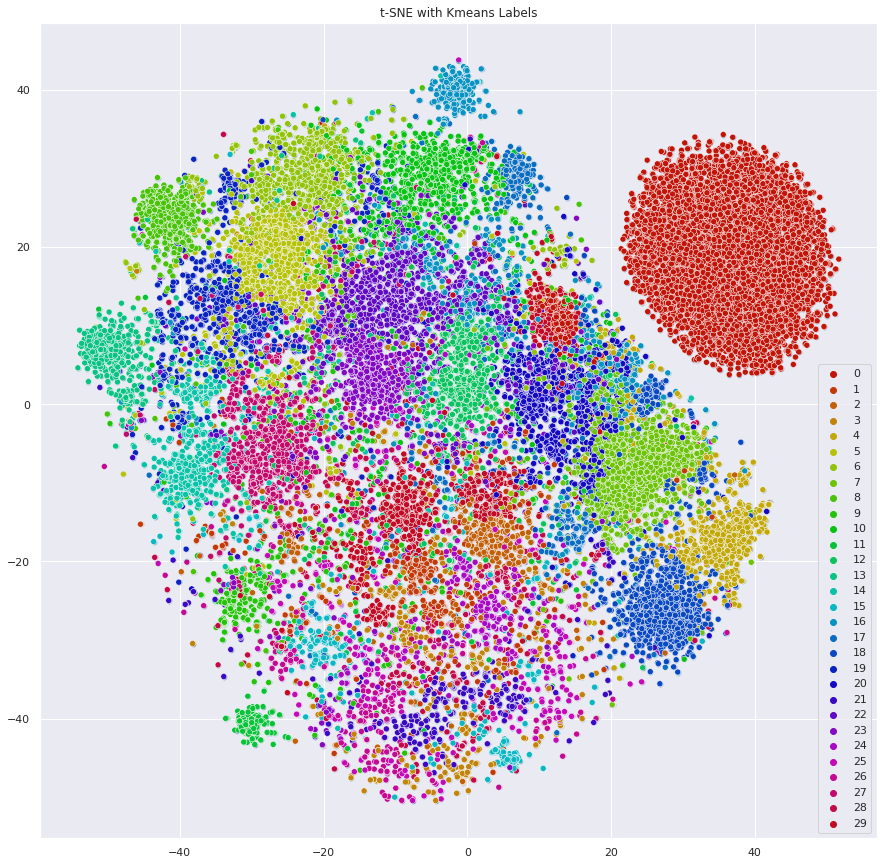

In [ ]:
nonlabelpic(X_emb)
labelpic(X_emb, y_pred)

### Identify Influencers Using Influence Maximization

In [ ]:
import itertools
from heapq import *

class PriorityQueue(object):
    def __init__(self):
        self.pq = []                         # list of entries arranged in a heap
        self.entry_finder = {}               # mapping of tasks to entries
        self.REMOVED = '<removed-task>'      # placeholder for a removed task
        self.counter = itertools.count()     # unique sequence count

    def add_task(self, task, priority=0):
        'Add a new task or update the priority of an existing task'
        if task in self.entry_finder:
            self.remove_task(task)
        count = next(self.counter)
        entry = [priority, count, task]
        self.entry_finder[task] = entry
        heappush(self.pq, entry)

    def remove_task(self, task):
        'Mark an existing task as REMOVED.  Raise KeyError if not found.'
        entry = self.entry_finder.pop(task)
        entry[-1] = self.REMOVED

    def pop_item(self):
        'Remove and return the lowest priority task. Raise KeyError if empty.'
        while self.pq:
            priority, count, task = heappop(self.pq)
            if task is not self.REMOVED:
                del self.entry_finder[task]
                return task, priority
        raise KeyError('pop from an empty priority queue')

    def __str__(self):
        return str([entry for entry in self.pq if entry[2] != self.REMOVED])

def degreeDiscountIC(G, k, p=.01):
    ''' Finds initial set of nodes to propagate in Independent Cascade model (with priority queue)
    Input: G -- networkx graph object
    k -- number of nodes needed
    p -- propagation probability
    Output:
    S -- chosen k nodes
    '''
    S = []
    dd = PriorityQueue() # degree discount
    t = dict() # number of adjacent vertices that are in S
    d = dict() # degree of each vertex

    # initialize degree discount
    for u in G.nodes():
        d[u] = sum([G[u][v]['weight'] for v in G[u]]) # each edge adds degree 1
        # d[u] = len(G[u]) # each neighbor adds degree 1
        dd.add_task(u, -d[u]) # add degree of each node
        t[u] = 0

    # add vertices to S greedily
    for i in range(k):
        u, priority = dd.pop_item() # extract node with maximal degree discount
        S.append(u)
        for v in G[u]:
            if v not in S:
                t[v] += G[u][v]['weight'] # increase number of selected neighbors
                priority = d[v] - 2*t[v] - (d[v] - t[v])*t[v]*p # discount of degree
                dd.add_task(v, -priority)
    return S

def degreeDiscountStar(G,k,p=.01):
    
    S = []
    scores = PriorityQueue()
    d = dict()
    t = dict()
    for u in G:
        d[u] = sum([G[u][v]['weight'] for v in G[u]])
        t[u] = 0
        score = -((1-p)**t[u])*(1+(d[u]-t[u])*p)
        scores.add_task(u, )
    for iteration in range(k):
        u, priority = scores.pop_item()
        S.append(u)
        for v in G[u]:
            if v not in S:
                t[v] += G[u][v]['weight']
                score = -((1-p)**t[u])*(1+(d[u]-t[u])*p)
                scores.add_task(v, score)
    return S


def _sumDist (G, S, no):
    ''' Compute cumulative distance from node to set S
    '''
    cum = 0
    for u in S:
        try:
            cum += G[no][u]['weight']
        except:
            pass
    return cum

def _minDist (G, S, no):
    ''' Compute minimal distance from node to S
    '''
    min_dist = float('Inf')
    for u in S:
        try:
            min_dist = min(G[no][u]['weight'], min_dist)
        except:
            pass
    if min_dist == float('Inf'):
        return -1
    else:
        return min_dist

def representativeNodes(G, k, metric=1):
    ''' Finds the most distinguishable (representative) nodes in graph G greedily.
    Takes the most furthest node to the already chosen nodes at each step.
    Input: G -- networkx object graph with weighted edges
    k -- number of nodes needed
    metric -- parameter for differentiating representative qualities
    metric == 1 trying to maximize total distance in the chosen set of k nodes
    metric == 2 trying to maximize minimal distance between a pair of k nodes
    Output:
    S -- chosen k nodes
    objv -- objective value according to the chosen metric and set of nodes
    '''

    S = [] # set of chosen nodes
    S_dist = PriorityQueue() # distances from each node in G to set S according to metric

    # initialize S with furthest vertices
    u,v,d = max(G.edges(data=True), key=lambda edge: edge[2]['weight'])
    S.extend([u,v])

    # compute distances from each node in G to S
    for v in G.nodes():
        if v not in S: # calculate only for nodes in G
            if metric == 1:
                S_dist.add_task(v, - _sumDist(G, S, v)) # take minus to pop the maximum value from priority queue
            elif metric == 2:
                S_dist.add_task(v, - _minDist(G, S, v)) # take minus to pop the maximum value from priority queue

    # add new nodes to the set greedily
    while len(S) < k:
        u, priority = S_dist.pop_item() # find maximum value of distance to set S
        S.append(u) # append that node to S

        # only increase distance for nodes that are connected to u
        for v in G[u].keys():
            if v not in S: # add only remained nodes
                [priority, count, task] = S_dist.entry_finder[v] # finds distance for the previous step
                try:
                    if metric == 1:
                        S_dist.add_task(v, priority-G[u][v]['weight']) # adds distance to the new member of S
                    elif metric == 2:
                        S_dist.add_task(v, max(priority, -G[u][v]['weight'])) # update min distance to the set S
                except:
                    raise Exception("These are vertices that caused the problem")

    # extract objective value of the chosen set
    if metric == 1:
        objv = 0
        for u in S:
            objv += _sumDist(G, S, u)
    elif metric == 2:
        objv = float('Inf')
        for u in S:
            objv = min(objv, _minDist(G, S, u))

    return S, objv

In [ ]:
S = degreeDiscountIC(G, 20)
print(S)
S = degreeDiscountStar(G, 20)
print(S)
S = representativeNodes(G, 20)
print(S)

['731954451448102912', '1963516285', '1496541763', '715501494657748992', '2405908961', '3245100357', '3076725085', '2265819537', '40519218', '970240141', '747329003174821888', '1140307843', '504300074', '4819969125', '2298043189', '1957654027', '3763060576', '183763871', '756384175469494272', '2244855535']
['539470162', '980821051', '337705928', '75206471', '344960349', '1461029406', '557458986', '3438035597', '2645847848', '189283341', '191274945', '1215993949', '1797987901', '35930362', '327100651', '95002152', '2443797760', '2263135940', '350594102', '75559710']
(['539470162', '980821051', '337705928', '75206471', '344960349', '76823111', '1461029406', '557458986', '3438035597', '2645847848', '189283341', '94039455', '191274945', '447624847', '4158654154', '3093586624', '3319844202', '1397914184', '1904146423', '39351188'], 64.0)


### hashtag

In [ ]:
tagset = {}
for idx, row in dat.iterrows():
  tags = [x.replace('"', "").replace(" ", "").replace("#", "") for x in row["tags"].strip("[]").split(",")]
  for tag in tags:
    tagset[tag] = tagset.get(tag, 0) + 1
  
tagset = sorted(tagset.items(), key=lambda x:x[1], reverse=True)
print(tagset)

[('nationaldogday', 30513), ('respecttylerjoseph', 6054), ('gloryoutnow', 600), ('backtohogwarts', 310), ('narcos', 269), ('steverogers', 211), ('louisweloveyou', 142), ('bournemouth', 130), ('bundesliga', 122), ('harrypotter', 103), ('belgiangp', 102), ('whatsapp', 94), ('halsey', 93), ('isac2016', 91), ('getwellsoonjackson', 89), ('labour', 83), ('justinssextapeleakedparty', 81), ('happybirthdayliampayne', 80), ('weekend', 79), ('britney', 77), ('journalsstansparty', 71), ('happyjungkookday', 71), ('happybirthdaydylanobrien', 68), ('capecanaveral', 65), ('galaxynote7', 62), ('youtubeisoverparty', 61), ('idonottrustanyonewho', 52), ('ueldraw', 49), ('felipemassa', 45), ('jorge', 40), ('ifa2016', 39), ('larryisoverparty', 35), ('justinreactivatedparty', 35), ('liamsbirthdayproject', 35), ('1yearofjetblackheart', 34), ('claudio', 32), ('nintendodirect', 31), ('britneytoday', 30), ('perfectillusionseptember9th', 30), ('italyearthquake', 30), ('veranomtv2016', 29), ('prettylittleliars', 2

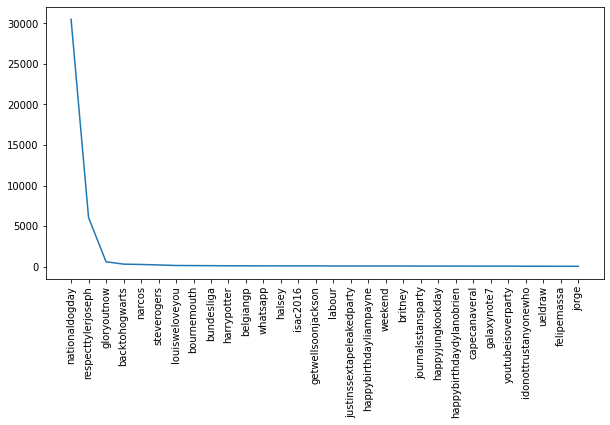

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot([x[0] for x in tagset[:30]], [x[1] for x in tagset[:30]])

In [ ]:
id2tags = {}
for idx, row in dat.iterrows():
  tags = [x.replace('"', "").replace(" ", "").replace("#", "") for x in row["tags"].strip("[]").split(",")]
  user_id = row["id"].strip('"')
  id2tags[user_id] = tags

for id in top_id_20:
  print(id, id2tags[id])

16190898 ['nationaldogday']
189283341 ['nationaldogday']
23497233 ['nationaldogday']
26642006 ['nationaldogday']
58309829 ['nationaldogday']
18912121 ['nationaldogday']
75206471 ['nationaldogday']
384047557 ['respecttylerjoseph']
19074134 ['nationaldogday']
70246837 ['nationaldogday']
394216985 ['nationaldogday', 'backtohogwarts']
94039455 ['nationaldogday']
423723318 ['nationaldogday']
113439399 ['nationaldogday']
72568426 ['emmastone']
19743731 ['nationaldogday']
23642374 ['nationaldogday']
219682445 ['nationaldogday', 'sherlock']
2896294831 ['nationaldogday']
24382752 ['nationaldogday']
74231747 ['nationaldogday']


### Detect Community

In [ ]:
from networkx import edge_betweenness_centrality
import networkx.algorithms.community as nx_comm
from networkx.algorithms.community.centrality import girvan_newman
from random import random
def most_central_edge(G):
    centrality = edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    centrality = {e: c / max_cent for e, c in centrality.items()}
    centrality = {e: c + random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)

coms = girvan_newman(G, most_valuable_edge=most_central_edge)

In [ ]:
# girvan_newman = list(coms)
# modularity_df = pd.DataFrame([[k+1, round(nx_comm.modularity(G, girvan_newman[k]), 6)] for k in range(len(girvan_newman))], columns=["k", "modularity"])
# modularity_df.plot.bar(x="k", figsize=(10,6), title="Girvan-Newman Community Detection Modularity Trend")
for communities in itertools.islice(coms, 3):
  print(tuple(len(c) for c in communities))

In [ ]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
     |████████████████████████████████| 3.2 MB 42.8 MB/s 


In [ ]:
import leidenalg
import igraph as ig

def get_leiden_communities(graph, random_state=0):
    return list(leidenalg.find_partition(graph, partition_type=leidenalg.ModularityVertexPartition, seed=random_state))
leiden_communities = get_leiden_communities(ig.Graph.from_networkx(G))

In [ ]:
node_nums = [len(x) for x in leiden_communities]
print(len(node_nums), node_nums)

6780 [5893, 4190, 3729, 2626, 1905, 1843, 1289, 1211, 1129, 1128, 1082, 691, 662, 582, 542, 517, 479, 455, 339, 279, 259, 251, 178, 167, 152, 117, 115, 107, 95, 88, 48, 46, 42, 41, 37, 29, 28, 27, 25, 22, 20, 17, 17, 14, 12, 12, 11, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,